Output variable -> y
y -> Whether the client has subscribed a term deposit or not 
Binomial ("yes" or "no")


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [32]:
bank = pd.read_csv("bank-full.csv")
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [33]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [34]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [35]:
data1=pd.get_dummies(bank,columns=['job','marital','education','contact','poutcome','month'])
data1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,no,2143,yes,no,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,no,29,yes,no,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,no,2,yes,yes,5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,no,1506,yes,no,5,92,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,no,1,no,no,5,198,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,977,3,-1,0,...,0,0,0,0,0,0,0,1,0,0
45207,71,no,1729,no,no,17,456,2,-1,0,...,0,0,0,0,0,0,0,1,0,0
45208,72,no,5715,no,no,17,1127,5,184,3,...,0,0,0,0,0,0,0,1,0,0
45209,57,no,668,no,no,17,508,4,-1,0,...,0,0,0,0,0,0,0,1,0,0


In [36]:
x=pd.concat([data1.iloc[:,0:10],data1.iloc[:,11:]],axis=1)
y=data1.iloc[:,10]

In [37]:
# Custom Binary Encoding of Binary o/p variables 
data1['default'] = np.where(data1['default'].str.contains("yes"), 1, 0)
data1['housing'] = np.where(data1['housing'].str.contains("yes"), 1, 0)
data1['loan'] = np.where(data1['loan'].str.contains("yes"), 1, 0)
data1['y'] = np.where(data1['y'].str.contains("yes"), 1, 0)
data1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,...,0,0,0,0,0,0,0,1,0,0
45207,71,0,1729,0,0,17,456,2,-1,0,...,0,0,0,0,0,0,0,1,0,0
45208,72,0,5715,0,0,17,1127,5,184,3,...,0,0,0,0,0,0,0,1,0,0
45209,57,0,668,0,0,17,508,4,-1,0,...,0,0,0,0,0,0,0,1,0,0


In [38]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int64
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int64
 4   loan                 45211 non-null  int64
 5   day                  45211 non-null  int64
 6   duration             45211 non-null  int64
 7   campaign             45211 non-null  int64
 8   pdays                45211 non-null  int64
 9   previous             45211 non-null  int64
 10  y                    45211 non-null  int64
 11  job_admin.           45211 non-null  uint8
 12  job_blue-collar      45211 non-null  uint8
 13  job_entrepreneur     45211 non-null  uint8
 14  job_housemaid        45211 non-null  uint8
 15  job_management       45211 non-null  uint8
 16  job_retired          4

In [39]:
# Dividing our data into input and output variables
x=pd.concat([data1.iloc[:,0:10],data1.iloc[:,11:]],axis=1)
y=data1.iloc[:,10]

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=42)

In [52]:
xtrain

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
3344,41,0,849,1,0,15,72,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
17965,49,0,1415,1,0,30,269,2,-1,0,...,0,0,0,1,0,0,0,0,0,0
18299,42,0,3842,0,0,31,130,4,-1,0,...,0,0,0,1,0,0,0,0,0,0
10221,37,0,-119,1,0,11,375,11,-1,0,...,0,0,0,0,1,0,0,0,0,0
32192,56,0,3498,0,0,15,264,2,-1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,44,0,1059,0,0,18,2093,1,-1,0,...,0,0,0,0,1,0,0,0,0,0
44732,23,0,508,0,0,8,210,1,92,1,...,0,0,0,0,0,0,0,0,0,1
38158,34,0,1317,1,0,15,239,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
860,33,0,165,0,0,7,111,1,-1,0,...,0,0,0,0,0,0,1,0,0,0


In [53]:
ytrain

3344     0
17965    0
18299    0
10221    0
32192    1
        ..
11284    1
44732    0
38158    0
860      0
15795    0
Name: y, Length: 36168, dtype: int64

In [54]:
xtest

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
3776,40,0,580,1,0,16,192,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
9928,47,0,3644,0,0,9,83,2,-1,0,...,0,0,0,0,1,0,0,0,0,0
33409,25,0,538,1,0,20,226,1,-1,0,...,0,0,0,0,0,0,0,0,0,0
31885,42,0,1773,0,0,9,311,1,336,1,...,0,0,0,0,0,0,0,0,0,0
15738,56,0,217,0,1,21,121,2,-1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13353,47,0,1890,0,0,8,161,1,-1,0,...,0,0,0,1,0,0,0,0,0,0
38732,32,0,217,1,0,15,692,3,-1,0,...,0,0,0,0,0,0,1,0,0,0
5654,52,0,0,1,0,26,206,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3779,40,0,783,1,1,16,171,2,-1,0,...,0,0,0,0,0,0,1,0,0,0


In [55]:
ytest

3776     0
9928     0
33409    0
31885    0
15738    0
        ..
13353    0
38732    1
5654     0
3779     0
11677    0
Name: y, Length: 9043, dtype: int64

In [56]:
lg = LogisticRegression() 
lg.fit(xtrain,ytrain) # Fitting the model to the training data
lg.coef_

array([[-1.72686807e-02, -2.24380815e-02,  2.39958058e-05,
        -7.57653088e-01, -2.12247264e-01, -1.20278311e-02,
         3.80980495e-03, -4.12390626e-01,  2.17673451e-03,
        -1.27720070e-01, -3.14295136e-02, -2.87637234e-01,
        -2.78849883e-02, -5.71947334e-03,  5.88269053e-03,
         1.82892005e-01, -1.45035135e-02, -9.66092070e-02,
         2.83108345e-02, -8.46182042e-02,  4.96454931e-03,
         2.27566796e-03,  2.20923063e-02, -1.92770806e-01,
        -1.53397887e-01, -7.77434724e-02, -3.05390048e-01,
         5.07154931e-02,  8.34164125e-03,  9.90821661e-02,
         6.21791153e-02, -4.85337668e-01, -1.49371702e-01,
        -3.26981693e-02,  3.47061289e-01, -4.89067805e-01,
         5.34390368e-02,  3.30524001e-02,  3.36158810e-02,
        -2.65966038e-02, -1.59260378e-02, -8.82270310e-02,
        -6.65706286e-02,  9.50679858e-02, -4.76778064e-01,
        -6.31339236e-02,  1.12332085e-01,  8.56485134e-02]])

In [57]:
xtest

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
3776,40,0,580,1,0,16,192,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
9928,47,0,3644,0,0,9,83,2,-1,0,...,0,0,0,0,1,0,0,0,0,0
33409,25,0,538,1,0,20,226,1,-1,0,...,0,0,0,0,0,0,0,0,0,0
31885,42,0,1773,0,0,9,311,1,336,1,...,0,0,0,0,0,0,0,0,0,0
15738,56,0,217,0,1,21,121,2,-1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13353,47,0,1890,0,0,8,161,1,-1,0,...,0,0,0,1,0,0,0,0,0,0
38732,32,0,217,1,0,15,692,3,-1,0,...,0,0,0,0,0,0,1,0,0,0
5654,52,0,0,1,0,26,206,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3779,40,0,783,1,1,16,171,2,-1,0,...,0,0,0,0,0,0,1,0,0,0


In [58]:
ytest

3776     0
9928     0
33409    0
31885    0
15738    0
        ..
13353    0
38732    1
5654     0
3779     0
11677    0
Name: y, Length: 9043, dtype: int64

In [59]:
ypred = lg.predict(xtest)
ypred

array([0, 0, 0, ..., 0, 0, 0])

In [60]:
print(ytest[:25].values) #Actual
print(ypred[:25]) #Predicted

[0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0]
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0]


In [61]:
from sklearn.metrics import confusion_matrix, classification_report

<Axes: >

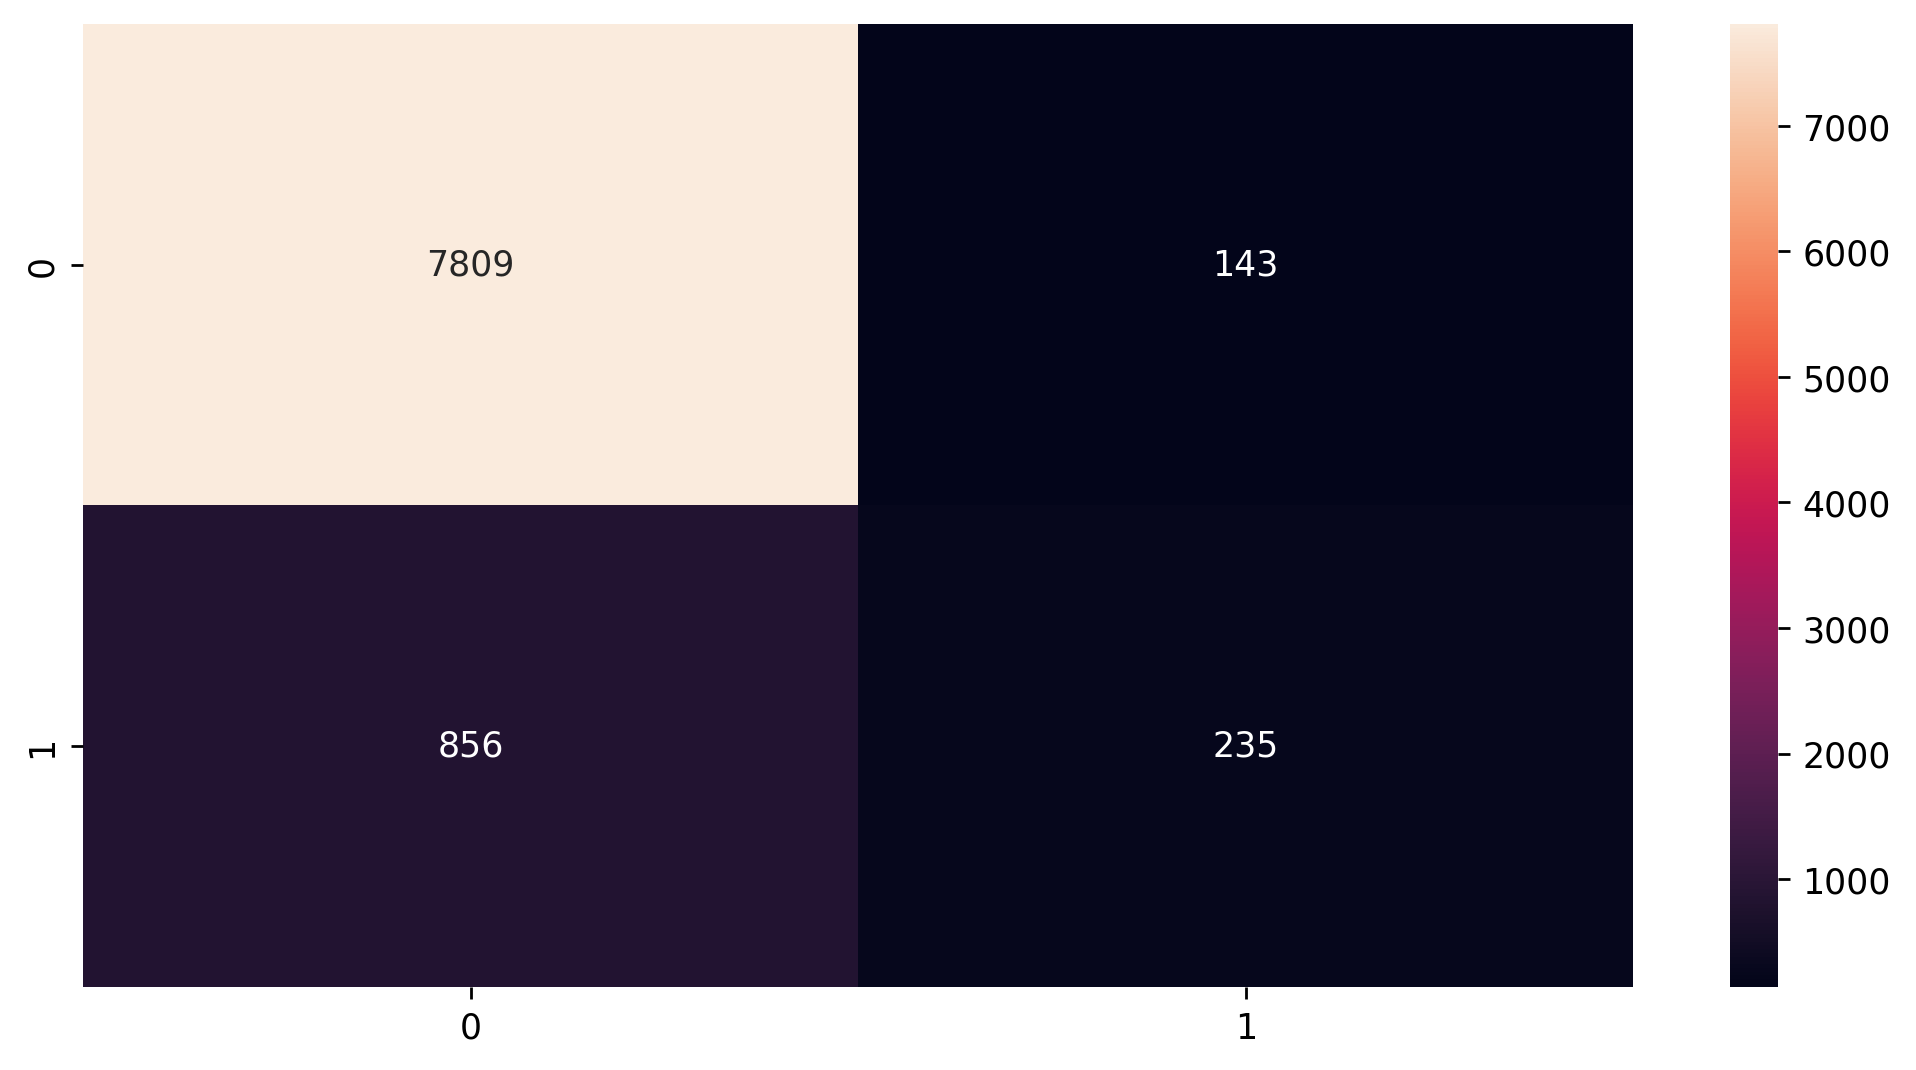

In [62]:
sns.heatmap(confusion_matrix(ytest,ypred),annot=True, fmt='g')

In [63]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.62      0.22      0.32      1091

    accuracy                           0.89      9043
   macro avg       0.76      0.60      0.63      9043
weighted avg       0.87      0.89      0.87      9043

